In [ ]:
#install all required libraries

!pip install kaggle
!pip install ipython
!pip install matplotlib
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import kagglehub

# Purpose: Download the animal image dataset from Kaggle to use for training the model.
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)
# Result: Prints the path to the downloaded dataset files, indicating successful download.


Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
# Purpose: Import necessary libraries for data processing, visualization, and model building.
# Result: Makes the functionalities of the imported libraries available for use in subsequent cells.

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Purpose: Check and print the number of available GPUs for accelerated computation.


if tf.config.list_physical_devices('GPU'):
    print("GPU Name:", tf.config.list_physical_devices('GPU')[0].name)
    # Purpose: Print the name of the GPU if available for identification.
# Result: To see the output, run the code. Prints the number of GPUs and the name of the GPU if available.

Num GPUs Available:  1
GPU Name: /physical_device:GPU:0


In [ ]:
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
# Purpose: Define the path to the downloaded dataset for easy access.
classes = os.listdir(dataset_path)
# Purpose: Retrieve the class names (animal types) from the dataset folders.
num_classes = len(classes)
# Purpose: Calculate the total number of classes (animal types) in the dataset.
print("Classes:", classes)
# Result: To see the output, run the code. Prints the names of the animal classes in the dataset.

print("Number of classes:", num_classes)
# Result: To see the output, run the code. Prints the total number of animal classes.

Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']
Number of classes: 90


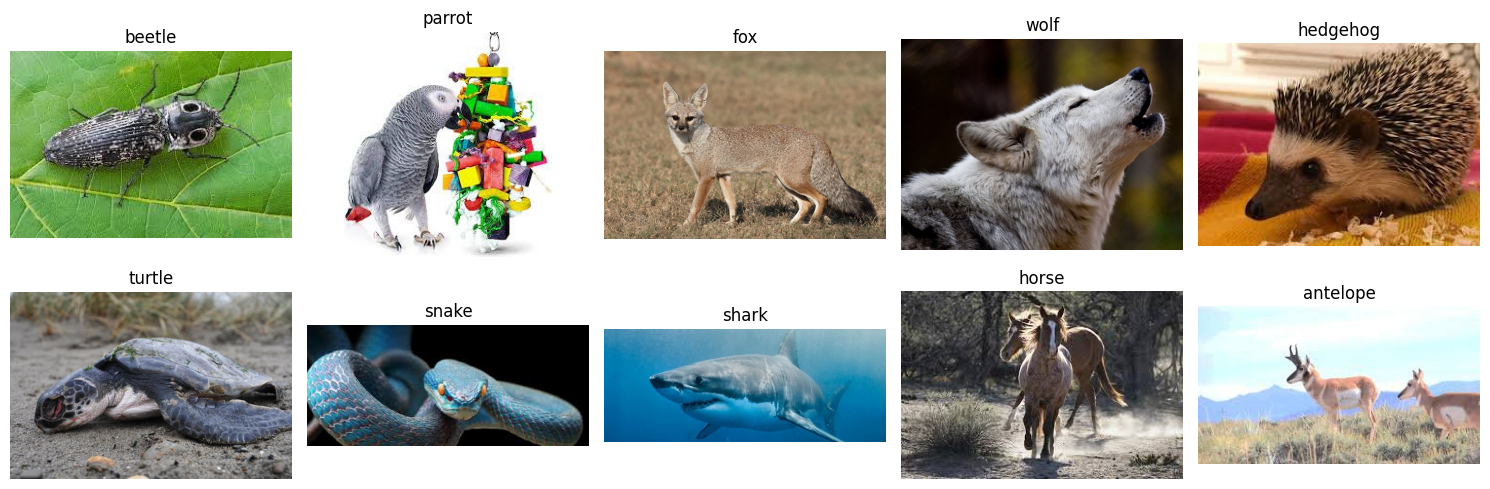

In [ ]:
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes[:10]):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, image_files)
    image = Image.open(image_path)

    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()
# Purpose: Display sample images from the first 10 classes of the dataset for visual inspection.
# Result: To see the output, run the code. Generates a plot containing sample images from the first 10 classes, with their corresponding class names as titles.
